# Clustaring and modeling
Find error by 'living_square' field

## Import, read and prepare data

In [ ]:
import pandas as pd
import vacija as va
print(va.__version__)

import glob

num_fileds=['square', 'not_living_square', 'common_hold_square', 'living_square', 'year', 'floors', 'entrance']

In [13]:
def read_and_prep(strFileName):
    dtfHouses=pd.read_csv(strFileName, encoding='cp1251', sep=';', index_col='id')
    dtfHouses=va.clean_for_research1(dtfHouses)
    dtfHouses[num_fileds]=dtfHouses[num_fileds].apply(lambda x: pd.to_numeric(x, errors='coerce').fillna(0))
    return dtfHouses.drop_duplicates(['latitude', 'longtitude'])

In [14]:
dtfWork=pd.concat([read_and_prep(f_csv) for f_csv in glob.glob(r'/home/egor/git/jupyter/vacija/Houses/*.csv')])

print(dtfWork.shape)

For cleaning ш. Варшавское, д. 144, к. 2 -  <class 'IndexError'>
For cleaning г. Зеленоград, д. 815 error -  <class 'KeyError'>
For cleaning special Moscow error -  <class 'ValueError'>


/home/egor/git/jupyter/vacija/vacija.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dtf.floors[dtf.floors>100]=0


For cleaning ш. Варшавское, д. 144, к. 2 -  <class 'IndexError'>
For cleaning г. Зеленоград, д. 815 error -  <class 'KeyError'>
For cleaning ш. Варшавское, д. 144, к. 2 -  <class 'IndexError'>
For cleaning г. Зеленоград, д. 815 error -  <class 'KeyError'>
For cleaning special Moscow error -  <class 'ValueError'>
For cleaning ш. Варшавское, д. 144, к. 2 -  <class 'IndexError'>
For cleaning г. Зеленоград, д. 815 error -  <class 'KeyError'>
For cleaning special Moscow error -  <class 'ValueError'>
For cleaning ш. Варшавское, д. 144, к. 2 -  <class 'IndexError'>
For cleaning г. Зеленоград, д. 815 error -  <class 'KeyError'>
For cleaning special Moscow error -  <class 'ValueError'>
For cleaning ш. Варшавское, д. 144, к. 2 -  <class 'IndexError'>
For cleaning г. Зеленоград, д. 815 error -  <class 'KeyError'>
For cleaning special Moscow error -  <class 'ValueError'>
For cleaning ш. Варшавское, д. 144, к. 2 -  <class 'IndexError'>
For cleaning г. Зеленоград, д. 815 error -  <class 'KeyError'>


## View and select obviuos errors

<IPython.core.display.Javascript object>


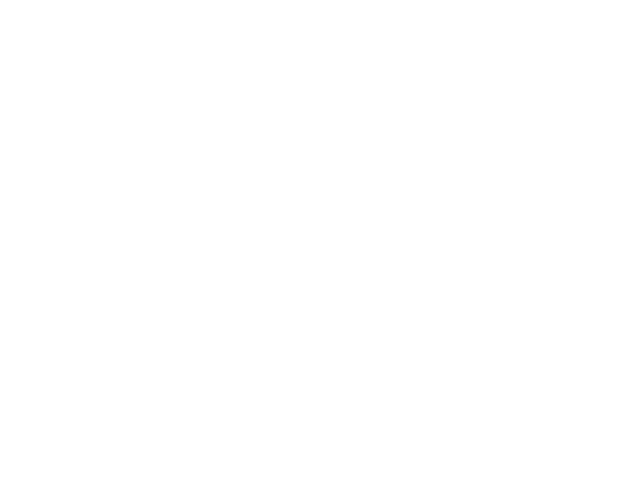

In [149]:
%matplotlib notebook
df_cln=dtfWork
df_cln.plot.scatter(x='entrance', y='floors', s=df_cln['living_square'] / df_cln['living_square'].max()*200);

### making service fields
'sqfllv' - living square by floors and entrance

<IPython.core.display.Javascript object>


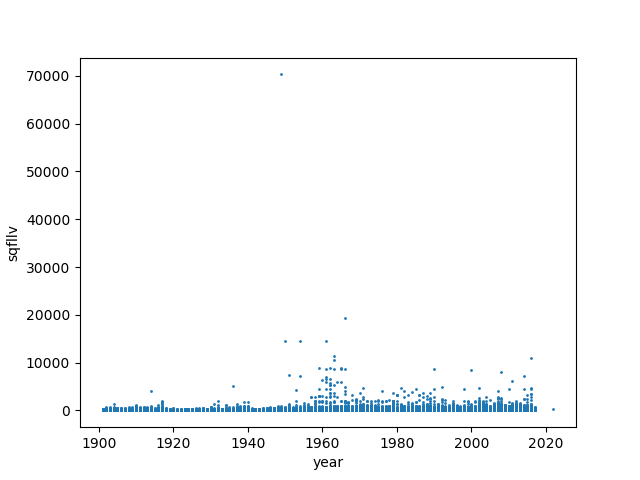

In [150]:
df2=dtfWork
df2['flo_ent']=df2['floors']*df2['entrance']
df2['sqfllv']=df2['living_square'] / df2['foo_ent']
df_cln[df_cln['year']>1900].plot.scatter(x='year', y='sqfllv', s=1);

In [159]:
print(dtfWork['seria'].unique().tolist())

['НЕ ЗАПОЛНЕНО', 'КИРПИЧНЫЙ', 'ПАНЕЛЬНЫЙ', 'ОТСУТСТВУЮТ СВЕДЕНИЯ', 'ДЕРЕВЯННЫЙ', 'ЖИЛЬЕ', 'ПР. 1-447С-44', '114C', 'ЗДАНИЕ', 'БЛОЧНЫЙ', 'НЕИЗВЕСТНА', '1980', 'С 114-52-196 С', '114С', 'ИНД', '1-447С-38', 'НЕИЗВЕСТНЫ', 'ТП1-4470-38', 'ТП1-4470-35', 'Ж/Б КАРКАС', 'БЛОКИРПИЧНЫЙ', 'НЕИЗВЕСТНО', '0', 'ДЕРЕЯННЫЙ', 'ЖИЛОЙ ДОМ', 'ДЕРЕВЯННЫЙ (БРУСОВОЙ)', 'БРУСОВОЙ', 'ДЕРЕВЯННЫЕ', 'ОТСУТСТВУЮТ', 'КАМЕННЫЙ', '114-86-1', '1-447 С-40', '1-447 С-43', '1-464 А', '1-467 А', '1-464 Д-104', 'НЕОПРЕДЕЛЕН', '1-464 А-1', '1-447 С-41', '1Р-447 С-54', '1-447 С-51', '1Р-447 С-25/65', '1-464 Д-105', 'ТИП А', '2-04-65-1', '1-467 А-15', '1-447 С-54/73', '1-467 Д-15', '1-467 Д-17', '1-467 Д-18', '1-468 А-7', '1-468 А-18', '1-335', '111-90', 'II-32', 'БНЧ1-468', '2М16-12', '83-120НЧ', '125', 'II-18-01/12', 'С-83', '1 - 528- КП80 ЭК', '2-Р-02-1', '1-114-86', '86 УАС 2-5', '1-468 Б-3, 4', '1-447 С-39', '124', '1-468 БНЧ', '1-468 Б-1, 2', '1-240-С', 'II-18/9', 'III-96', 'III-134', 'Э-0907(141)', 'II-60', 'Э-0931/1.5'

### Prepare data for clustering - marking obvious errors
<ul>
<li>-5 - not data for clustaring at all</li>
<li>-4 - living_square = 0; may be work field for modeling</li>
<li>-3 - not enouth data for modeling (floors and entrance)</li>
<li>-2 - living_square exists, but definitely wrong (or wrong by clustaring analisis)</li>
<li>-1 - for now reserved</li>
<li>0 - not error</li>
</ul>

In [120]:
from sklearn.preprocessing import LabelEncoder

lst_model_fields=['living_square', 'floors', 'entrance', 'wall', 'year', 'sqfllv', 'flo_ent']
wall_encoder=LabelEncoder()

X_prep=dtfWork

wall_encoder.fit(X_prep['wall_type'])

#print(wall_encoder.classes_)
X_prep['wall']=wall_encoder.fit_transform(X_prep['wall_type'])

X_prep['error']=(X_prep[['living_square', 'floors', 'entrance']] == 0).all(axis=1) * -5
X_prep.ix[(X_prep['error']==0) & (X_prep['living_square']==0), 'error']=-4
X_prep.ix[(X_prep['error']==0) & (X_prep[['floors', 'entrance']]==0).all(axis=1), 'error']=-3

# let's say that 0-entrance or 0-floors means 1 entrance and 1 floors for not (antrance and floors)==0
X_prep.ix[(X_prep['error']==0) & (X_prep['entrance']==0), 'entrance'] = 1
X_prep.ix[(X_prep['error']==0) & (X_prep['floors']==0), 'floors'] = 1

X_prep['flo_ent']=X_prep['floors'] * X_prep['entrance']
X_prep['sqfllv']=X_prep['living_square'] / (X_prep['floors'] * X_prep['entrance'])

# 15 - min sqr of room, 1200 = 120 - max sqr of room (elite), 10 rooms on floor (not elite)
X_prep.ix[(X_prep['error']==0) & (~X_prep['sqfllv'].between(15, 1200)), 'error']=-2

print('All {0}, with def. errors {1}, m.b. clean {2}'.format(dtfWork.shape,
                                                             X_prep[X_prep['error']!=0].shape, 
                                                             X_prep[X_prep['error']==0].shape))

X_check_prep=X_prep[lst_model_fields+['error']]
print(X_check_prep[X_check_prep['error']==0])

All (222080, 52), with def. errors (34240, 52), m.b. clean (187840, 52)
         living_square  floors  entrance  wall    year      sqfllv  flo_ent  \
id                                                                            
8488153          737.0     2.0       2.0     3  1969.0  184.250000      4.0   
8488156          752.6     2.0       2.0     3  1970.0  188.150000      4.0   
6463379         3205.0     5.0       5.0     3  1985.0  128.200000     25.0   
8760276         1007.8     3.0       2.0     3  1987.0  167.966667      6.0   
6463380         2413.4     4.0       4.0     3  1975.0  150.837500     16.0   
6522539         2399.1     4.0       4.0     3  1976.0  149.943750     16.0   
6463381         2233.0     4.0       4.0     3  1973.0  139.562500     16.0   
8787702         4146.4     5.0       6.0     3  1980.0  138.213333     30.0   
8912879          381.6     2.0       2.0     3  1965.0   95.400000      4.0   
8912880          514.8     2.0       2.0     3  1965.0  128

<IPython.core.display.Javascript object>


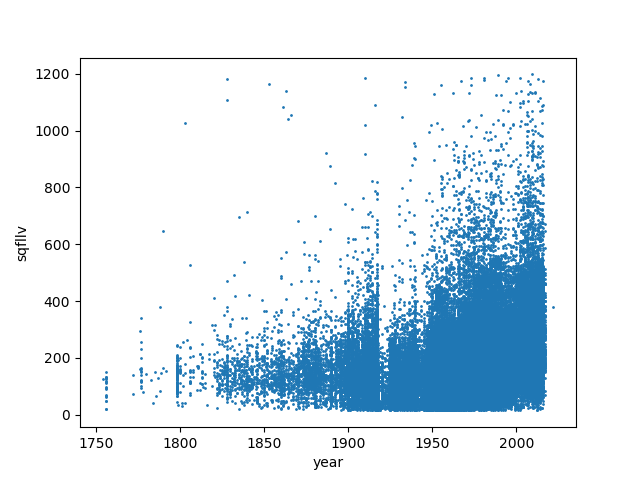

In [135]:
X_check_prep.ix[(X_check_prep['error']==0) & (X_check_prep['year']>1750)].plot.scatter(x='year', y='sqfllv', s=1)

In [249]:
from sklearn.cluster import AffinityPropagation, KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter('ignore')

clus_pipe=Pipeline([ ('clust', KMeans(n_clusters=5))])

X_Y=X_prep.ix[X_prep['error']==0, lst_model_fields]

def split_year(x):
    if x<1750: return 0
    if x<1920: return 1
    if x<1960: return 2
    if x<1980: return 3
    if x<2000: return 4
    return 5

X_Y['labels']=X_Y['year'].apply(split_year)

X=X_Y[X_Y['labels']==3]
#print(X_Y['labels'].unique().tolist())
#print(mms.fit_transform(X))
# The following bandwidth can be automatically detected using
#bandwidth = estimate_bandwidth(X.as_matrix(), n_samples=1000)

#ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
#ms.fit(X)
#cluster_centers = ms.cluster_centers_

#X['labels']=ms.labels_

#print(X['labels'].unique().tolist())

#print(X[X['labels']==0])
X['labs']=clus_pipe.fit_predict(X[['sqfllv', 'wall', 'flo_ent']]) 
#labels_unique = X['labels'].unique().tolist() #np.unique(ms.labels_)
print(X['labs'].unique().tolist())
#n_clusters_ = 5 #= len(labels_unique)

#X['labels'] = ms.labels_
#print(X[X['labels']==0].sort_values(by='living_square', ascending=False))
#print(cluster_centers)
#X_err=X[X['labels']>7]
#print(X_err)
#print(X[X['labels']==0])

[4, 1, 3, 0, 2]


<IPython.core.display.Javascript object>


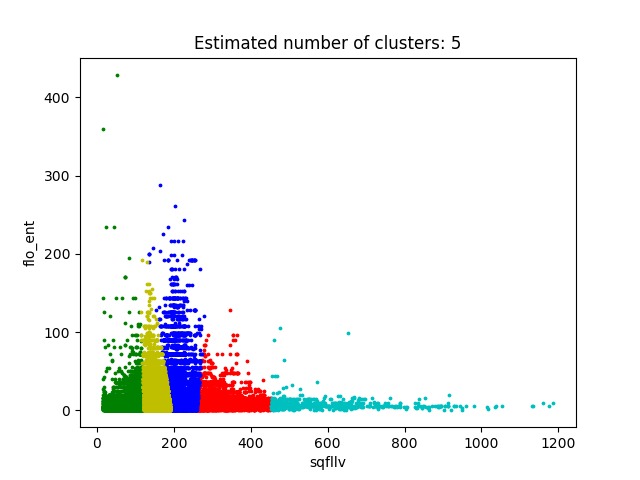

In [247]:
#x_plot=X[X['labels']==4]
import matplotlib.pyplot as plt
from itertools import cycle

x_plot=X#[X['year']>1750]

#x_plot['flo_ent']=x_plot['floors']*x_plot['entrance']
n_clusters_ = len(x_plot['labs'].unique().tolist())

plt.figure(1)
plt.clf()

lbl_x='sqfllv'
lbl_y='flo_ent'
sz=3 #x_plot['sqfllv'] / x_plot['sqfllv'].max()*200

ax1=x_plot[x_plot['labs']==0].plot.scatter(x=lbl_x, y=lbl_y, c='r', 
                                             s=sz)
ax1=x_plot[x_plot['labs']==1].plot.scatter(x=lbl_x, y=lbl_y, c='g', ax=ax1,
                                             s=sz)

ax1=x_plot[x_plot['labs']==2].plot.scatter(x=lbl_x, y=lbl_y, c='b', ax=ax1,
                                             s=sz)

ax1=x_plot[x_plot['labs']==3].plot.scatter(x=lbl_x, y=lbl_y, c='y', ax=ax1,
                                             s=sz)
ax1=x_plot[x_plot['labs']==4].plot.scatter(x=lbl_x, y=lbl_y, c='c', ax=ax1,
                                             s=sz)

#colors = cycle('grcmykbgrcmykbgrcmykbgrcmyk')
#for k, col in zip(range(1, n_clusters_), colors):
    #print (k, col)
#    plx=x_plot[x_plot['labels']==k]
    #my_members = labels == k
    #cluster_center = cluster_centers[k]
    #plt.plot(plx['living_square'], plx['floors'], col + '.')
#    plx.plot.scatter(x='entrance', y='floors', 
#                     s=plx['living_square'] / plx['living_square'].max()*200, c=col, ax=ax1)
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
    #         markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show();

#x_plot.plot.scatter(x='entrance', y='floors', s=x_plot['living_square'] / x_plot['living_square'].max()*100)

[1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0]
453.418 1186.42222222
         living_square  floors  entrance  wall    year       sqfllv  flo_ent  \
id                                                                             
7555574       10677.80     9.0       1.0     5  1973.0  1186.422222      9.0   
7665900        5880.20     5.0       1.0     3  1967.0  1176.040000      5.0   
6913308       10446.90     9.0       1.0     5  1973.0  1160.766667      9.0   
7884239        5671.40     5.0       1.0     3  1962.0  1134.280000      5.0   
6736012        5657.05     5.0       1.0     3  1972.0  1131.410000      5.0   
9088566        5269.00     5.0       1.0     0  1979.0  1053.800000      5.0   
6913344        5189.70     5.0       1.0     5  1972.0  1037.940000      5.0   
8071794        4142.20     4.0       1.0     0  1971.0  1035.550000      4.0   
6851025        20

<IPython.core.display.Javascript object>


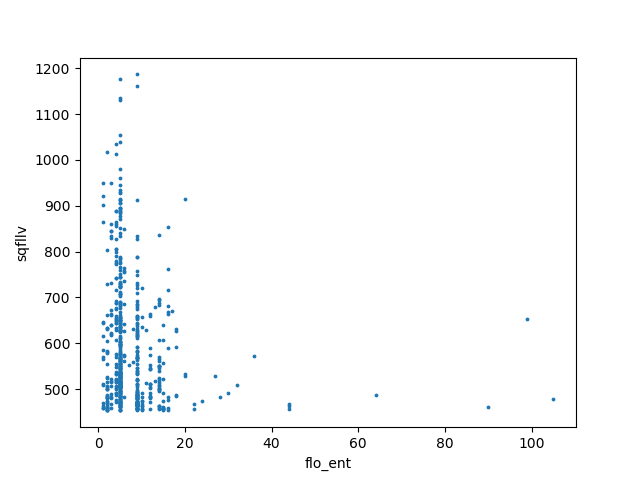

In [248]:
xp=X[X['labs']==4]
#print(xp.sort_values(by=['sqfllv', 'year'], ascending=False))
print(xp['year'].sort_values().unique().tolist())
print(xp['sqfllv'].min(), xp['sqfllv'].max())
print(xp.sort_values(by='sqfllv', ascending=False))
xp.plot.scatter(x='flo_ent', y='sqfllv', s=3)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

X0=X[X['labels']==0]
X0['lab2']=MiniBatchKMeans(n_clusters=5).fit_predict(X0)

print(X0[X0['lab2']==1].sort_values(by='living_square', ascending=False) )

In [ ]:
%matplotlib notebook

import matplotlib.pyplot as plt
from itertools import cycle

#plt.figure(1)
#plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    #print (k, col)
    plx=X[X['labels']==k]
    #my_members = labels == k
    #cluster_center = cluster_centers[k]
    #plt.plot(plx['living_square'], plx['floors'], col + '.')
    plx.plot.scatter(x='floors', y='living_square', c=col, s=2)
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
    #         markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show();

In [ ]:
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import radviz

#scatter_matrix(X[['labels', 'floors', 'entrance']], alpha=0.6, figsize=(9, 9), diagonal='kde')
plt.figure()
radviz(X, 'labels')

In [ ]:
X.plot.scatter(x='floors', y='entrance', c=X['labels']*0.1, colormap='prism', s=2)

In [9]:
import nltk
from nltk.corpus import stopwords
#nltk.download()
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр